<a href="https://colab.research.google.com/github/irinaotto/NN_project/blob/main/NN_Group_Project_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognition Using Neural Networks

## Section 1. Introduction to MNIST

Excerpt of introduction

#### 1.1 Load Data

In [7]:
#import all libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import SOM_Implementation as som
import matplotlib.pyplot as plt

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=False,
    with_info=True)

In [3]:
len(ds_train)

60000

In [4]:
len(ds_test)

10000

In [ ]:
## Section 2. Introduction of the Algorithms

Excerpt from paper

## Section 3. Methodology

Insert excerpt from paper

## Section 4. Training and Testing

### Feature Reduction with PCA

In [ ]:
#insert code here

### Restricted Boltzmann Machine

In [ ]:
#insert code here

### Self-Organizing Maps
#### Creating and Training Data
SOM network is define as 10X10 matrix, the input data is expected as 28*28 

Experiment: train model with different number of epochs and validate accuracy of the model on testing set

In [35]:
epochs=[5,10,15,20]
training_set=ds_train.take(1000)
my_models=pd.DataFrame(columns=['epoch', 'model'])
for epoch in epochs:
    my_som = som.SOM(20, 20, 28*28, epoch)
    my_som.train(training_set)
    #After the unsupervised learning, we take training data labels and assigned to centroids
    mapped, labels = my_som.map_vects(ds_train)
    mappedarr = np.array(mapped)
    my_som.set_labels(mappedarr, labels)
    my_som.set_centroids_with_label_prob()
    my_models=my_models.append({'epoch':epoch, 'model': my_som}, ignore_index=True)

In [39]:
my_models

,epoch,model
0,5,<SOM_Implementation.SOM object at 0x0000027E15...
1,10,<SOM_Implementation.SOM object at 0x0000027E14...
2,15,<SOM_Implementation.SOM object at 0x0000027E15...
3,20,<SOM_Implementation.SOM object at 0x0000027E15...


### Predict accuracy based on the model

In [48]:
#PREDICT ON TEST DATA
test_accuracy=pd.DataFrame(columns=['epoch', 'accuracy'])
test_data=ds_test.take(400)
test_mapped, test_labels=my_som.map_vects(test_data)
test=np.array(test_mapped)
for index in my_models.index:
    model=my_models['model'][index]
    accuracy=0
    for i in range(len(test)):
        predicted_label,prob=model.predict(test[i])
        if predicted_label==test_labels[i]:
            accuracy=accuracy+1
    print(accuracy)
    accuracy=accuracy/len(test_data)
    test_accuracy=test_accuracy.append({'epoch': my_models['epoch'][index], 'accuracy':accuracy}, ignore_index=True)

50
41
80
167


In [49]:
test_accuracy


,epoch,accuracy
0,5.0,0.250
1,10.0,0.205
2,15.0,0.400
3,20.0,0.835


In [ ]:
### Mapping of the digits to the neurons

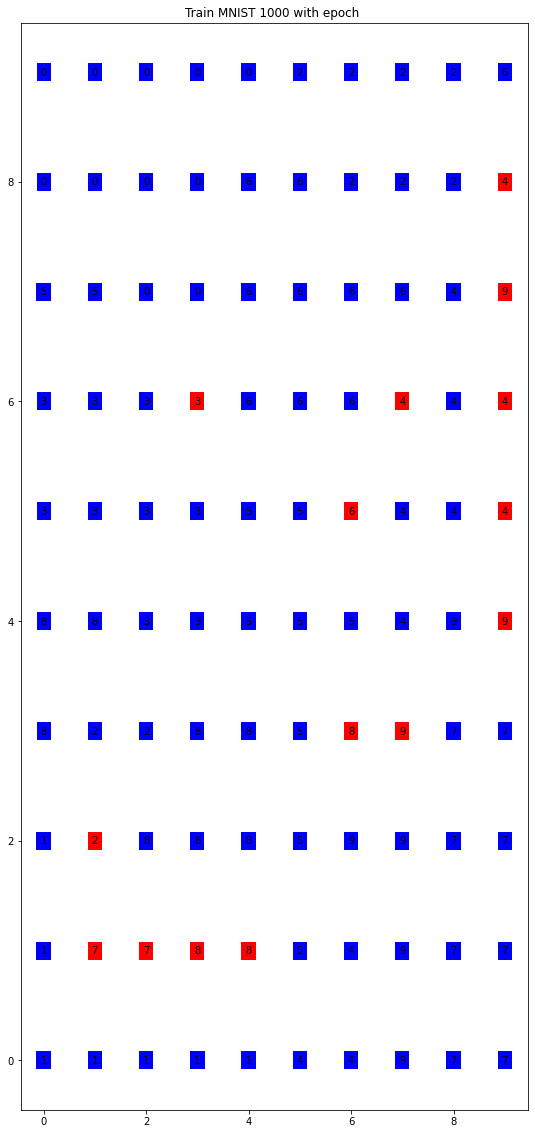

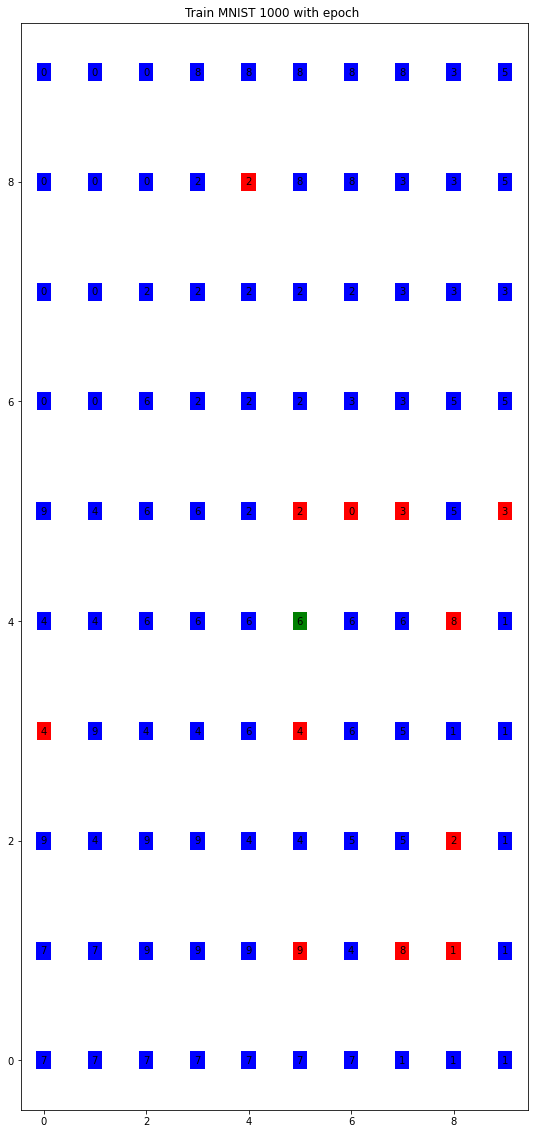

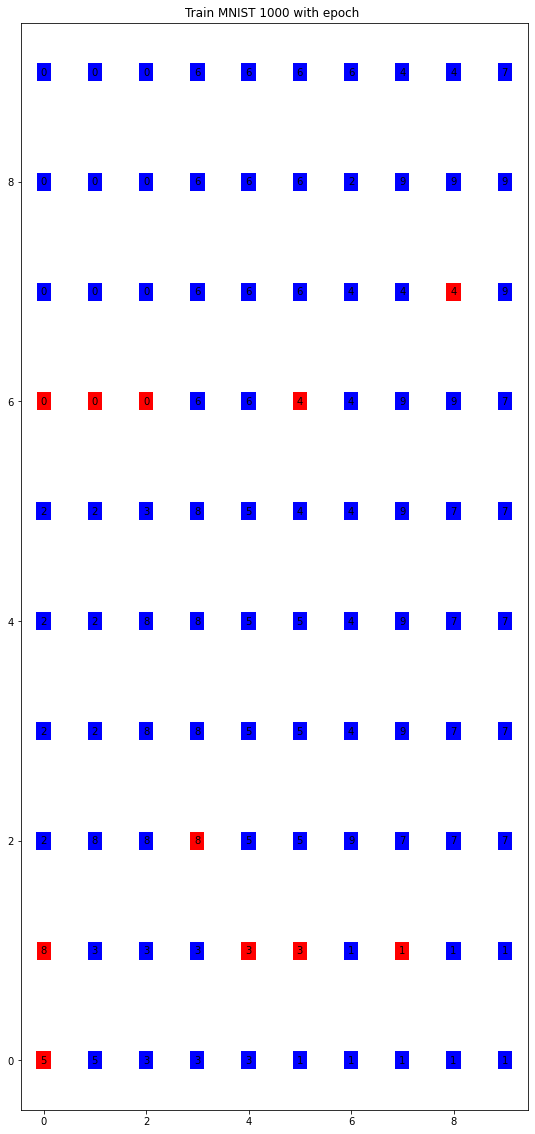

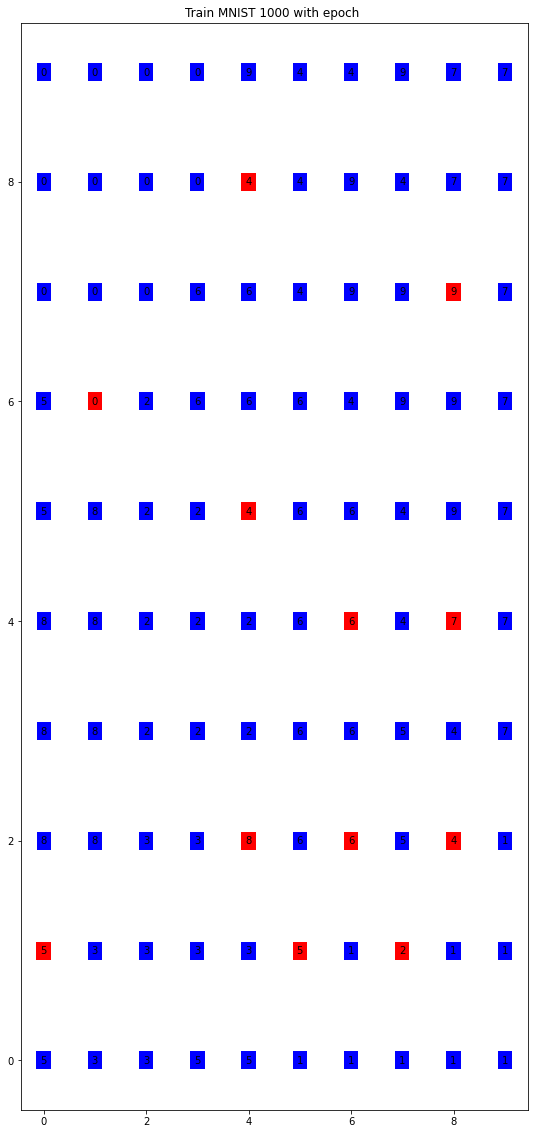

In [38]:
for index in my_models.index:
    model=my_models['model'][index]
    centroids_with_labels=model.get_centroids_with_label_prob()
    x1=centroids_with_labels['x']
    y1=centroids_with_labels['y']
    plt.figure(1, figsize=(20,20))
    plt.subplot(121)
    # Plot 1 for Training only
    plt.scatter(x1,y1)
    # Just adding text
    col='green'
    for i in centroids_with_labels.index:
         if centroids_with_labels['prob'][i]==1:
            col='green'
         elif (centroids_with_labels['prob'][i]<1 and centroids_with_labels['prob'][i]>0.5):
            col='blue'
         else:
            col='red'
         plt.text(centroids_with_labels['x'][i],centroids_with_labels['y'][i],int(centroids_with_labels['label'][i]),
                     ha='center', va='center', bbox=dict(facecolor=col, alpha=1, lw=0))
    plt.title('Train MNIST 1000 with epoch ')
    plt.show()

### Output